<a href="https://colab.research.google.com/github/BhargaviM0729/Traffic-Sign-Recognition-Using-Convolutional-Neural-Networks-with-Interactive-Gradio-Deployment/blob/main/Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"bhargavimunukuntla","key":"9a32ed940186fd0f9c47e601556d73e8"}'}

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
gtsrb-german-traffic-sign.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip gtsrb-german-traffic-sign.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [10]:
# Import the necessary modules and initialize variables
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
total_classes = 43
cur_directory = os.getcwd()


In [11]:
# Initialize data and labels as empty lists
data = []
labels = []

for index in range(total_classes):
    path = os.path.join(cur_directory, 'train', str(index))
    images = os.listdir(path)

    # Iterating through all images of the index folder
    for img in images:
        try:
            # Open image
            image = Image.open(os.path.join(path, img))
            image = image.resize((30, 30))  # Resize the image
            image = np.array(image)  # Convert to NumPy array

            data.append(image)  # Append image to list
            labels.append(index)  # Append label to list
        except Exception as e:
            # Provide more information about the error
            print(f"Error loading image: {img}. Error: {e}")

# Convert to NumPy arrays after all data has been collected
data = np.array(data)
labels = np.array(labels)

# Print shapes of data and labels arrays
print(data.shape, labels.shape)


(39209, 30, 30, 3) (39209,)


In [12]:
# Training a model
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print("shape of x_train:",x_train.shape," and y_train:", y_train.shape)
print("shape of x_test:",x_test.shape, "and y_test:", y_test.shape)

# one hot encoding the labels
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

shape of x_train: (31367, 30, 30, 3)  and y_train: (31367,)
shape of x_test: (7842, 30, 30, 3) and y_test: (7842,)


In [13]:
# CNN model architecture

model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (5,5),activation = 'relu',input_shape = x_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size  = (5,5),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43,activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Training and saving the model
epochs = 15
history = model.fit(x_train, y_train, batch_size = 64, epochs = epochs, validation_data = (x_test, y_test))
model.save('traffic_recognition.h5')

Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.2124 - loss: 4.3643 - val_accuracy: 0.7924 - val_loss: 0.8899
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6545 - loss: 1.1860 - val_accuracy: 0.8911 - val_loss: 0.4846
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7845 - loss: 0.7258 - val_accuracy: 0.9463 - val_loss: 0.2217
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8368 - loss: 0.5383 - val_accuracy: 0.9574 - val_loss: 0.1578
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8671 - loss: 0.4406 - val_accuracy: 0.9466 - val_loss: 0.1691
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8895 - loss: 0.3704 - val_accuracy: 0.9670 - val_loss: 0.1214
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9047 - loss: 0.3132 - val_accuracy: 0.9644 - val_loss: 0.1288
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9063 - loss: 0.3027 - val_accuracy:

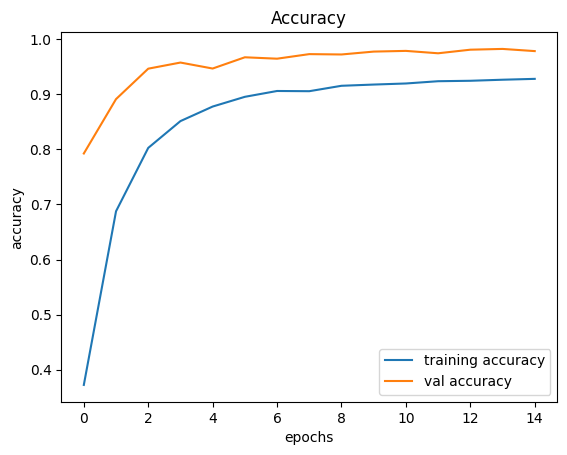

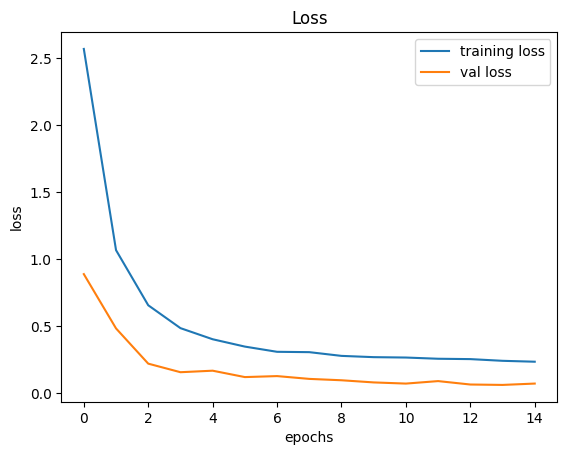

In [16]:
# plot the accuracy graph
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'training accuracy')
plt.plot(history.history['val_accuracy'],label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [17]:
# Testing the model
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
img_paths = y_test["Path"].values

test_data = []

for path in img_paths:
    image = Image.open(path)
    image = image.resize((30,30))
    test_data.append(np.array(image))
test_data = np.array(test_data)
pred = np.argmax(model.predict(test_data),axis = 1)

# Accuracy with the test data

from sklearn.metrics import accuracy_score
accuracy_score(labels,pred)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


0.9464766429136976

In [18]:
model.save('traffic_recognition.h5')

In [23]:
from tensorflow.keras.models import load_model


In [24]:
import os
print(os.listdir("/content"))



['.config', 'Train.csv', 'Meta.csv', 'kaggle (1).json', 'Train', 'traffic_recognition.h5', 'train', 'Test', 'test', 'Meta', 'kaggle.json', 'gtsrb-german-traffic-sign.zip', 'Test.csv', 'meta', 'sample_data']


In [25]:
model = load_model("/content/traffic_recognition.h5")



In [26]:
!pip install gradio tensorflow pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 8.3 MB/s eta 0:00:00


Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3737 - loss: 2.3183 - val_accuracy: 0.9606 - val_loss: 0.1456
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9196 - loss: 0.2629 - val_accuracy: 0.9846 - val_loss: 0.0547
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9517 - loss: 0.1532 - val_accuracy: 0.9901 - val_loss: 0.0351
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9663 - loss: 0.1103 - val_accuracy: 0.9929 - val_loss: 0.0364
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9721 - loss: 0.0921 - val_accuracy: 0.9918 - val_loss: 0.0282
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9763 - loss: 0.0778 - val_accuracy: 0.9925 - val_loss: 0.0308
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9756 - loss: 0.0799 - val_accuracy: 0.9938 - val_loss: 0.0237
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9801 - loss: 0.0651 - val_accuracy: 0

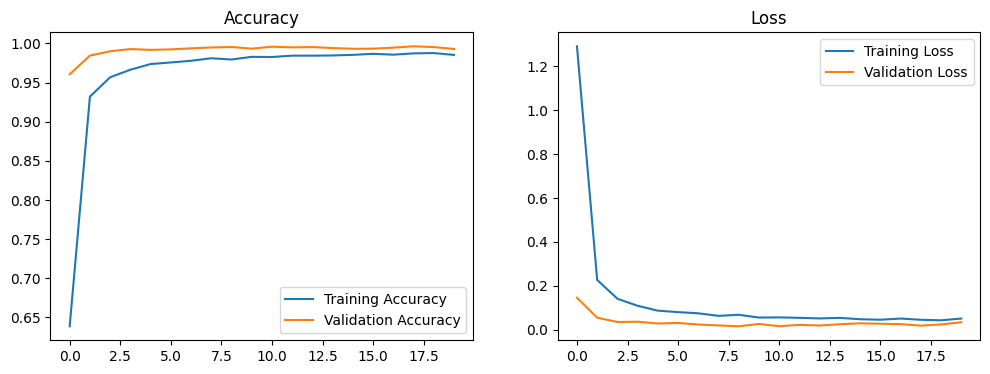

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0356
Validation Accuracy: 99.30%
Testing image: /content/drive/My Drive/path_to_70km_image.jpg
Error: [Errno 2] No such file or directory: '/content/drive/My Drive/path_to_70km_image.jpg'
Testing image: /content/drive/My Drive/path_to_stop_sign_image.jpg
Error: [Errno 2] No such file or directory: '/content/drive/My Drive/path_to_stop_sign_image.jpg'


In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import os
import matplotlib.pyplot as plt


data = []
labels = []
classes = 43

for i in range(classes):
    path = os.path.join(cur_directory, 'Train', str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = Image.open(os.path.join(path, img))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Build the model
model = Sequential([
    Input(shape=(30, 30, 3)),  # Define input shape here
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(rate=0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(rate=0.5),
    Dense(classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Test with sample images
def classify_image(file_path):
    try:
        img = Image.open(file_path).convert('RGB')  # Ensure RGB format
        img = img.resize((30, 30))  # Resize to model input size
        img_array = np.array(img) / 255.0  # Normalize
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        pred = model.predict(img_array)
        pred_class = np.argmax(pred, axis=1)[0]  # Get the predicted class index
        confidence = np.max(pred)  # Get the confidence score
        sign = classes.get(pred_class, "Unknown Sign")
        return f"Predicted: {sign} (Confidence: {confidence:.2f})"
    except Exception as e:
        return f"Error: {e}"

def test_sample_images():
    sample_images = [
        "/content/drive/My Drive/path_to_70km_image.jpg",
        "/content/drive/My Drive/path_to_stop_sign_image.jpg"
    ]
    for img_path in sample_images:
        print(f"Testing image: {img_path}")
        print(classify_image(img_path))

test_sample_images()

In [28]:
model.save('traffic_recognition.h5')

In [29]:
from tensorflow.keras.models import load_model
model = load_model("/content/traffic_recognition.h5")

In [30]:
!pip install gradio

In [36]:
import numpy as np
import tensorflow as tf
from PIL import Image
import gradio as gr

# Load the trained model
model = load_model("/content/traffic_recognition.h5")  # Update the path if necessary

# Dictionary to map class indices to traffic sign names
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}

# Function to preprocess the image and make a prediction
def classify_image(file_path):
    try:
        # Open and preprocess the image
        img = Image.open(file_path).convert('RGB')  # Ensure image is in RGB format
        img = img.resize((30, 30))  # Resize to model input size
        img_array = np.array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Model prediction
        pred = model.predict(img_array)
        pred_class = np.argmax(pred, axis=1)[0]  # Get the predicted class index
        confidence = np.max(pred)  # Get the confidence score

        # Map to class label
        sign = classes.get(pred_class, "Unknown Sign")
        return f"Predicted: {sign} (Confidence: {confidence:.2f})"
    except Exception as e:
        return f"Error: {e}"

# Create Gradio interface
iface = gr.Interface(
    fn=classify_image,  # Function to call
    inputs=gr.Image(type="filepath"),  # Input is a file path to an image
    outputs="text",  # Output is the predicted class label
    title="Traffic Sign Recognition",
    description="Upload an image of a traffic sign, and the model will classify it."
)

# Launch the Gradio app
iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://84ab1d89b18f9011b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
